## Understanding the OLS Summary Table

- In the previous section, we showed theoretically and practically how we can derive a coefficient matrix $\beta$, just from the objective function of minimising the mean squared error (MSE)

- But you should notice something odd about our results. Our matrix algebra gave us only coefficient values

- But the OLS table actually gives us so much more than this! 

- How can we derive every part of the OLS Summary table? Let's find out

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
# import statsmodels.formula.api as smf
import statsmodels.api as sm

x,y = make_regression(
    n_samples=500, 
    n_features=5, 
    n_informative=2, 
    n_targets=1, 
    noise=5, 
    bias=5,
    random_state=123
)
x = np.append(x, np.ones((500,1)), axis = 1)
print(x.shape)

betas = np.linalg.inv((x.transpose() @ x)) @ x.transpose() @ y
np.set_printoptions(suppress=True)
print(betas)

print('='*50)
res = sm.OLS(exog=x, endog=y, hasconst=True).fit()
res.summary()

(500, 6)
[-0.16521089  0.2381359   0.00976686 60.45175552 26.46640238  4.8924384 ]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.775e+04
Date:                Sun, 06 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:55:16   Log-Likelihood:                -1508.0
No. Observations:                 500   AIC:                             3028.
Df Residuals:                     494   BIC:                             3053.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1652      0.233     -0.710      0.478      -0.622       0.292
x2             0.2381      0.236      1.008      0.314      -0.226       0.702
x3             0.0098      0.222      0.044      0.965      -0.426       0.445
x4            60.4518      0.222    272.722      0.000      60.016      60.887
x5            26.4664      0.227    116.601      0.000      26.020      26.912
const          4.8924      0.223     21.982      0.000       4.455       5.330
==============================================================================
Omnibus:                        1.207   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                1.202
Skew:                           0.028   Prob(JB):                        0.548
Kurtosis:                       2.766   Cond. No.                         1.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### $R^2$

- $R^2$ measures the "goodness of fit" of the regression
- That is, how much of the deviation from the outcome mean $\bar{y}$ does my model predict? 
$$R^2 = 1 - \frac{RSS}{TSS} = \frac{ESS}{TSS}$$

#### Concepts: TSS, RSS, ESS

- Before understanding $R^2$, let's first go through the constituent concepts
    - **Total Sum of Squares (TSS):** 
        - The sum of squared differences between the observations $y_i$ and their overall mean value $\bar{y}$ 
        - This is a measure of the variability of the data around its own mean; the more dispersed the data is, the larger this measure will be
        - $\sum_i (y_i - \bar{y})^2$
    
    - **Model/Explained Sum of Squares (MSS/ESS):** 
        - The sum of squared differences between the predictions $\hat{y_i}$ and the mean values $\bar{y}$ 
        - Of the total sum of squares for a point $i$, how much of it is accounted for by the model?
        - $\sum_i (\hat{y_i} - \bar{y})^2$

    - **Residual Sum of Squares (RSS):** 
        - The sum of squared differences between the observations $y_i$ and the predicted values $\hat{y_i}$ 
        - Of the total sum of squares for a point $i$, how much of it is missed by the model?
        - $\sum_i (y_i - \hat{y_i})^2$

- Intuitively, **TSS** is a measure of the variation between the observations and their average value
    - The model, if well fitted, should explain some part of this variation. That is; the predictions provided by the model should do better than predicting the "average" value of the outcome
    - How do we measure "predicts better than the average value"?
    - Simple! 
        - Find all the squared differences between the outcomes and their average i.e. $\sum_i (y_i - \bar{y})^2$
        - Find all the squared differences between the outcomes and the model's predictions i.e. $\sum_i (y_i - \hat{y})^2$
        - If the second term is smaller than the first, that must mean that the model's predictions have reduced the variation in the observed data!
    - This corresponds exactly to **TSS** and **RSS**!
    
- Since **TSS** represents all possible variation, and **RSS** represents the leftover variation after a model is applied, what is the measure of the variation accounted for by the model? Simple, just take the difference of the 2!
$$\begin{aligned}
    \text{TSS} &= \sum_i (y_i - \bar{y})^2 \\
    \text{RSS} &= \sum_i (y_i - \hat{y})^2 \\
    \text{ESS} &= \sum_i (y_i - \bar{y} - (y_i - \hat{y}))^2 \\
    &= \sum_i (\hat{y}- \bar{y})^2
\end{aligned}$$

- Visually, we can see it this way

Text(10, 6, 'RSS')

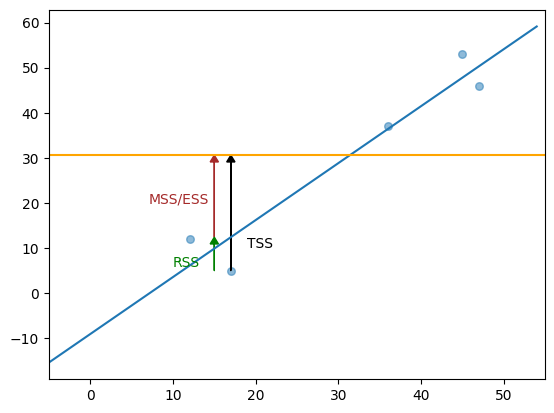

In [109]:
import matplotlib.pyplot as plt
import random
import numpy as np

x = [45, 47, 17, 12, 36]
y = [53, 46, 5, 12, 37]
index=2

xarr = np.array(x).reshape(-1,1)
xarr = np.concat([xarr, np.ones(len(x)).reshape(-1,1)], axis=1)
yarr = np.array(y).reshape(1,-1)

beta = np.linalg.inv(xarr.T @ xarr) @ xarr.T @ y
linevals = np.array([x for x in range(-5,55)]).reshape(-1,1)
linevals = np.concat([linevals, np.ones(len(linevals)).reshape(-1,1)], axis=1)
ypred = linevals @ beta.T

plt.scatter(x,y,alpha=0.5,s=30)
plt.plot(range(-5, 55), ypred)

plt.hlines(y=np.mean(y),xmin=-10,xmax=60, color='orange')
plt.xlim(-5,55)

plt.arrow(
    x=x[index], 
    y=y[index], 
    dx=0, 
    dy=np.mean(y)-y[index],
    length_includes_head=True,
    head_width=1,
    color='black'
)

plt.arrow(
    x=x[index]-2, 
    y=ypred[x[index]+5], 
    dx=0, 
    dy=np.mean(y)-ypred[x[index]+5],
    length_includes_head=True,
    head_width=1,
    color='brown'
)

plt.arrow(
    x=x[index]-2, 
    y=y[index], 
    dx=0, 
    dy=ypred[x[index]+5] - y[index],
    length_includes_head=True,
    head_width=1,
    color='green'
)

plt.text(
    x=x[index] + 2, 
    y=y[index] + 5, 
    s='TSS'
)

plt.text(
    x=x[index] - 10, 
    y=y[index] + 15, 
    s='MSS/ESS',
    color='brown'
)

plt.text(
    x=x[index] - 7, 
    y=y[index] + 1, 
    s='RSS',
    color='green'
)

#### Deep Dive: Prove that TSS = RSS + ESS

- Wait a second; from the math above, it is only true that 
$$\begin{aligned}
    y_i - \bar{y} &= y_i - \hat{y} + \hat{y} - \bar{y}
\end{aligned}$$

- How do we know that the squared terms are still equal? i.e. how do we know that this is true:
$$\begin{aligned}
    \text{Prove: }\sum_i (y_i - \bar{y})^2 &= \sum_i (y_i - \hat{y})^2 + \sum_i (\hat{y} - \bar{y})^2 \qquad (1)
\end{aligned}$$

- Let's start from scratch:
$$\begin{aligned}
    \sum_i (y_i - \bar{y}) &= \sum_i [(y_i - \hat{y}) + (\hat{y} - \bar{y})] \\
    \sum_i (y_i - \bar{y})^2 &= \sum_i (y_i - \hat{y})^2 + \sum_i (\hat{y} - \bar{y})^2 + \sum_i 2 \cdot (\hat{y} - \bar{y}) \cdot (y_i - \hat{y})
\end{aligned}$$

- From the above, for the statement $(1)$ to be true, it implies that 
$$\begin{aligned}
    \sum_i 2 \cdot (\hat{y} - \bar{y}) \cdot (y_i - \hat{y}) &= 0 \\
    \sum_i (\hat{y} - \bar{y}) \cdot e_i &= 0 & \because y_i - \hat{y} = e_i \\
    \sum_i \hat{y} e_i - \sum_i \bar{y} e_i &= 0
\end{aligned}$$

- Of the two terms above, we know that $\sum_i \bar{y} e_i = 0$
$$\begin{aligned}
    \sum_i \bar{y} e_i &= \bar{y} \sum_i e_i & \because \bar{y} \text{ is constant} \\
    &= \sum_i e_i \\
    &= 0 & \because \text{sum of errors is mean centered at 0}
\end{aligned}$$

- We also know that $\sum_i \hat{y} e_i = 0$
    - **SEE NEXT SECTION FOR REASONING**

- Therefore, $\sum_i \hat{y} e_i - \sum_i \bar{y} e_i = 0$, which implies:
$$\begin{aligned}
    \sum_i (y_i - \bar{y})^2 &= \sum_i (y_i - \hat{y})^2 + \sum_i (\hat{y} - \bar{y})^2 + \sum_i 2 \cdot (\hat{y} - \bar{y}) \cdot (y_i - \hat{y}) \\
    &= \sum_i (y_i - \hat{y})^2 + \sum_i (\hat{y} - \bar{y})^2 \\ \\

    \therefore TSS &= RSS + ESS
\end{aligned}$$


#### Deep Dive 2: Prove that $\sum_i \hat{y_i} e_i = 0$

- First, note that $e_i = y_i - \hat{y}_i$
- In OLS, recall that we are minimising the sum of squared errors. That is, we minimise RSS
$$\begin{aligned}
    \argmin_\beta \sum_{i=1}^{n} e_i^2 &= \argmin_\beta \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \\
    &= \argmin_\beta RSS
\end{aligned}$$

- Recall that in doing this minimisation, we adjust coefficients to $\beta^*$, such that $\hat{y}_i = X_i \beta^*$

- Let's rewrite RSS in terms of $\beta$
$$\begin{aligned}
    RSS &= \sum_{i=1}^{n} e_i^2 \\
    &= \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \\
    &= \sum_{i=1}^{n} (y_i - X_i \beta)^2 \\
\end{aligned}$$

- To get rid of the summation, let's rewrite this in vector notation
$$\begin{aligned}
    RSS &= \sum_{i=1}^{n} (y_i - X_i \beta)^2 \\
    &= (y - X \beta)^T (y - X \beta)
\end{aligned}$$

- Next, to minimise RSS w.r.t to $\beta$, we solve for 
$$\begin{aligned}
    \frac{\partial RSS}{\partial \beta} &= \frac{\partial }{\partial \beta} [(y - X \beta)^T (y - X \beta)] \\
    &= \frac{\partial}{\partial \beta} [y^Ty] - \frac{\partial}{\partial \beta} [(X\beta)^T y] - \frac{\partial}{\partial \beta} [y^T (X\beta)] + \frac{\partial}{\partial \beta} (\beta^T X^T X \beta) \\
    &= -2 \frac{\partial}{\partial \beta} [(X\beta)^T y] + \frac{\partial}{\partial \beta} (\beta^T X^T X \beta) \\
    &= -2 \frac{\partial}{\partial \beta} [\beta^T X^T y] + \frac{\partial}{\partial \beta} (\beta^T X^T X \beta) \\
    &= -2 X^T y + 2 (X^T X \beta) \\
    &= -2 X^T (y - X\beta) \\
    &= -2 X^T (y - \hat{y}) \\
    &= -2 X^T e \\
    &= 0
\end{aligned}$$

- What is the intuition of this result?
    - For any design matrix $X$, we want it to be orthogonal to the errors from the regression
    - That is, any errors from the regression must not be correlated with the values $X$!!

- Ok, but how does that lead to the conclusion that $\sum_i \hat{y_i} e_i = \hat{y} e= 0$?
$$\begin{aligned}
    X^Te &= 0 \\
    \beta^T X^Te &= \beta^T \cdot 0 \\
    (X \beta)^T e &= 0 \\
    \therefore \hat{y} e = 0
\end{aligned}$$

#### Tying back to $R^2$

- So far we have established that:
    - TSS is the variation of the outcome around its mean value
    - RSS is the variation left after subtracting the predicted outcome from the observed outcomes 
    - TSS = RSS + ESS

- Intuitively, if TSS measures the natural variation of the outcome variable, and RSS measures the leftover variation after modelling, then $\frac{RSS}{TSS}$ must intuitively be the proportion of the variation unexplained by the model!
    - Therefore, $R^2 = 1 - \frac{RSS}{TSS} = \frac{ESS}{TSS}$, which is the proportion of variation explained by the model!

- Let's try to derive the values we see in the table

In [13]:
ypred = x @ betas
tss = np.sum((y - np.mean(y))**2)
rss = np.sum((y - ypred)**2)
ess = np.sum((ypred - np.mean(y))**2)

## ESS + RSS = TSS
print(f"{ess + rss=}")
print(f"{tss=}")

## Compute R^2 = 0.994
r2 = 1 - (rss/tss)
print(f"{r2=}")

r2 = (ess/tss)
print(f"{r2=}")

ess + rss=np.float64(2202799.20978951)
tss=np.float64(2202799.209789509)
r2=np.float64(0.9944631472698778)
r2=np.float64(0.9944631472698783)


#### Adjusted $R^2$

- Adjusted $R^2$ is the same as $R^2$, but we adjust both TSS and RSS by the available degrees of freedom used to get the sum of squares

$$\begin{aligned}
    \text{Adj.} R^2 &= 1 - \frac{\frac{RSS}{n-k-1}}{\frac{TSS}{n-1}} \\
    &= 1 - \frac{\frac{RSS}{TSS}}{\frac{n-1}{n-k-1}} \\
    &= 1 - [(1 - R^2) \cdot \frac{n-1}{n-k-1}] & \because \frac{RSS}{TSS} = 1 - R^2 \\
\end{aligned}$$

In [16]:
ypred = x @ betas
tss = np.sum((y - np.mean(y))**2)
rss = np.sum((y - ypred)**2)
ess = np.sum((ypred - np.mean(y))**2)

## ESS + RSS = TSS
print(f"{ess + rss=}")
print(f"{tss=}")

## Compute R^2 = 0.994
r2 = 1 - (rss/tss)
print(f"{r2=}")

adj_r2 = 1 - ((rss / (x.shape[0] - x.shape[1] - 1)) / (tss / (x.shape[0]-1)))
print(f"{adj_r2=}")

ess + rss=np.float64(2202799.20978951)
tss=np.float64(2202799.209789509)
r2=np.float64(0.9944631472698778)
adj_r2=np.float64(0.9943957616382739)
